In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DT,RF,GB,XGB,LGB 

In [3]:
os.getcwd()

'C:\\Users\\user1\\Desktop\\다연\\다연\\파이썬\\[공부]\\DADADA\\Dacon\\hospital_classfication\\analysis'

In [4]:
os.chdir('C:\\Users\\user1\\Desktop\\다연\\다연\\파이썬\\[공부]\\DADADA\\Dacon\\hospital_classfication\\data')

## train dataset

In [23]:
df_train = pd.read_csv('train_data_imputed.csv')
del df_train['Unnamed: 0']
df_train.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,...,surplus2,employee1,employee2,inst_id,OC,sido,sgg,openDate,instkind,ownerChange
0,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,31641798.0,2.251697e+08,...,1.271224e+09,62.0,64.0,1,1.0,choongnam,73,20071228.0,nursing_hospital,same
1,410.0,5.669102e+10,1.312034e+10,4.080951e+10,2.631515e+10,1.162273e+09,1.407767e+09,8.333929e+08,438818159.0,2.076850e+09,...,6.561434e+09,801.0,813.0,3,1.0,gyeongnam,32,19970401.0,general_hospital,same
2,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,0.000000e+00,0.0,4.186475e+07,...,0.000000e+00,234.0,1.0,4,1.0,gyeonggi,89,20161228.0,nursing_hospital,same
3,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,173769780.0,9.028303e+08,...,7.740829e+09,663.0,663.0,7,1.0,incheon,141,20000814.0,general_hospital,same
4,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,0.0,8.074970e+07,...,9.025550e+09,206.0,197.0,9,1.0,gyeongnam,32,20050901.0,general_hospital,same


In [26]:
X_train = df_train.drop(['inst_id','OC','sido','sgg','openDate','instkind','ownerChange'],axis=1)
y_train = df_train['OC']

In [27]:
dum_x_train = pd.get_dummies(X_train)
dum_x_train.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,31641798.0,2.251697e+08,...,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0
1,410.0,5.669102e+10,1.312034e+10,4.080951e+10,2.631515e+10,1.162273e+09,1.407767e+09,8.333929e+08,438818159.0,2.076850e+09,...,0.0,3.704254e+10,1.424474e+10,5.637182e+09,2.279780e+10,1.638689e+10,2.094380e+10,6.561434e+09,801.0,813.0
2,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,0.000000e+00,0.0,4.186475e+07,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0
3,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,173769780.0,9.028303e+08,...,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0
4,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,0.0,8.074970e+07,...,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0


## test dataset

In [28]:
df_test = pd.read_csv('test_data_imputed.csv')
del df_test['Unnamed: 0']
df_test.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,...,surplus2,employee1,employee2,inst_id,OC,sido,sgg,openDate,instkind,ownerChange
0,300.0,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,76680000.0,5.036692e+08,...,8.944587e+09,693.000000,693.000000,2,NaN,incheon,139,19981125.0,general_hospital,same
1,44.0,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,0.0,4.525557e+08,...,0.000000e+00,379.000000,371.000000,5,NaN,jeju,149,20160309.0,hospital,same
2,276.0,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,0.0,-2.148749e+09,...,1.638540e+10,376.857143,360.857143,6,NaN,jeonnam,103,19890427.0,general_hospital,same
3,363.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.850652e+09,2.060989e+09,0.000000e+00,0.0,2.789663e+09,...,0.000000e+00,760.000000,760.000000,8,NaN,busan,71,20100226.0,general_hospital,same
4,213.0,5.037025e+10,0.000000e+00,4.855803e+10,2.296346e+10,1.534452e+09,0.000000e+00,2.573804e+09,0.0,3.346675e+09,...,1.507269e+10,437.000000,385.000000,10,NaN,jeonbuk,26,20040604.0,general_hospital,same


In [29]:
X_test = df_test.drop(['inst_id','OC','sido','sgg','openDate','instkind','ownerChange'],axis=1)
y_test = df_test['OC']

In [30]:
dum_x_test = pd.get_dummies(X_test)
dum_x_test.head()

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,300.0,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,76680000.0,5.036692e+08,...,0.0,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693.000000,693.000000
1,44.0,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,0.0,4.525557e+08,...,0.0,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379.000000,371.000000
2,276.0,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,0.0,-2.148749e+09,...,0.0,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,376.857143,360.857143
3,363.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.850652e+09,2.060989e+09,0.000000e+00,0.0,2.789663e+09,...,0.0,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760.000000,760.000000
4,213.0,5.037025e+10,0.000000e+00,4.855803e+10,2.296346e+10,1.534452e+09,0.000000e+00,2.573804e+09,0.0,3.346675e+09,...,0.0,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437.000000,385.000000


## DT

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [32]:
dt_clf = DecisionTreeClassifier(random_state=1234)
dt_clf.fit(dum_x_train,y_train)
pred = dt_clf.predict(dum_x_test)

In [22]:
# dum_x_train.columns.difference(dum_x_test.columns)

Index(['instkind_dental_clinic'], dtype='object')

- ownerChange, instkind 범주형 변수 제거 (이유 : testset에 instkind의 dental_clinic의 값이 없어 변수 1개가 차이나 fit을 하지 못함) ownerChange는 범주형이며 분석에 영향없다고 판단)

In [33]:
from sklearn.model_selection import GridSearchCV

In [107]:
params = {
    'max_depth':[4,6,8,10,12,14]
}
grid_cv =GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(dum_x_train,y_train)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : {0}'.format(grid_cv.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 정확도 : 0.9070
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 4}


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.9s finished


In [108]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,4,0.906977
1,6,0.903654
2,8,0.897010
3,10,0.890365
4,12,0.890365
5,14,0.890365


In [128]:
params = {
    'max_depth' : [4,6,8,10],
    'min_samples_split' : [10,14,18,22]
}

grid_cv = GridSearchCV(dt_clf,param_grid = params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(dum_x_train,y_train)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : {0}'.format(grid_cv.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 정확도 : 0.9302
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 4, 'min_samples_split': 10}


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.2s finished


In [129]:
dt_pred = grid_cv.predict(X_test)
dt_pred_proba = grid_cv.predict_proba(X_test)[:,1]
dt_pred

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

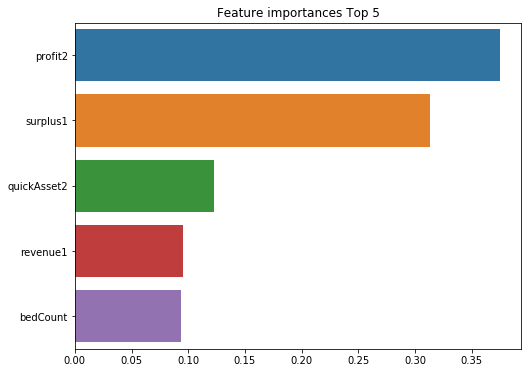

In [48]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(dum_x_test)
ftr_importances_values = best_dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=dum_x_train.columns)
ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 5')
sns.barplot(x=ftr_top5,y=ftr_top5.index)
plt.show()

## RF

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [115]:
rf_clf = RandomForestClassifier(random_state=1234)
rf_clf.fit(dum_x_train,y_train)
pred = rf_clf.predict(dum_x_test)
pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [112]:
params = {
    'n_estimators' : [100],
    'max_depth' : [4,6,8,10],
    'min_samples_leaf' : [10,14,18],
    'min_samples_split' : [10,14,18]
}

In [113]:
rf_clf = RandomForestClassifier(random_state=1234,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(dum_x_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 성능도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}
최고 예측 성능도:0.9502


In [114]:
rf_pred = grid_cv.predict(X_test)
rf_pred_proba = grid_cv.predict_proba(X_test)[:,1]
rf_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

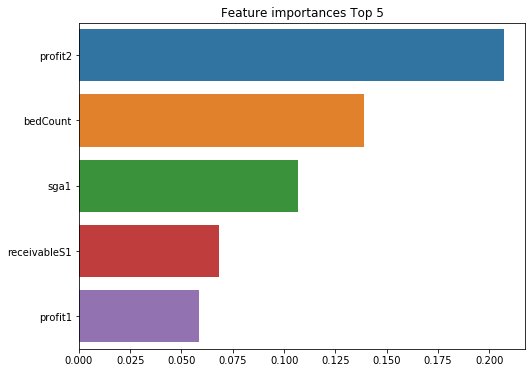

In [64]:
best_rf_clf = grid_cv.best_estimator_
pred1 = best_rf_clf.predict(dum_x_test)
ftr_importances_values = best_rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=dum_x_train.columns)
ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 5')
sns.barplot(x=ftr_top5,y=ftr_top5.index)
plt.show()

## GB

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
import time
start_time = time.time()

In [116]:
gb_clf = GradientBoostingClassifier(random_state=1234)
gb_clf.fit(dum_x_train,y_train)
gb_pred = gb_clf.predict(X_train)

In [117]:
params={
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}

In [118]:
grid_cv = GridSearchCV(gb_clf,param_grid=params,cv=2,verbose=1) # verbose =1 : 훈령 진행도를 보여줌
grid_cv.fit(dum_x_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 100}
최고 예측 정확도:0.7674


In [120]:
gb_pred = grid_cv.predict(X_test)
gb_pred_prob = grid_cv.predict_proba(X_test)[:,1]
gb_pred

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [119]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_learning_rate','param_n_estimators','mean_test_score']]

,param_learning_rate,param_n_estimators,mean_test_score
0,0.05,100,0.767442
1,0.05,500,0.764120
2,0.1,100,0.747508
3,0.1,500,0.740864


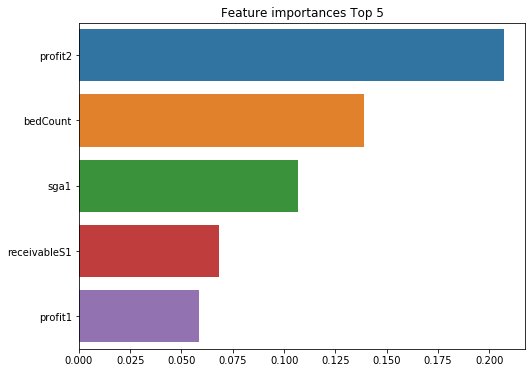

In [63]:
best_gb_clf = grid_cv.best_estimator_
pred1 = best_gb_clf.predict(dum_x_test)
ftr_importances_values = best_gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=dum_x_train.columns)
ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 5')
sns.barplot(x=ftr_top5,y=ftr_top5.index)
plt.show()

## XGB

In [67]:
import xgboost as xgb

In [66]:
!pip install xgboost

In [68]:
dtrain = xgb.DMatrix(data=dum_x_train,label=y_train)
dtest = xgb.DMatrix(data=dum_x_test,label=y_test)

In [78]:
from xgboost import XGBClassifier

In [126]:
xgb_wrapper = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=4)
xgb_wrapper.fit(dum_x_train,y_train)
xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
xgb_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1.])

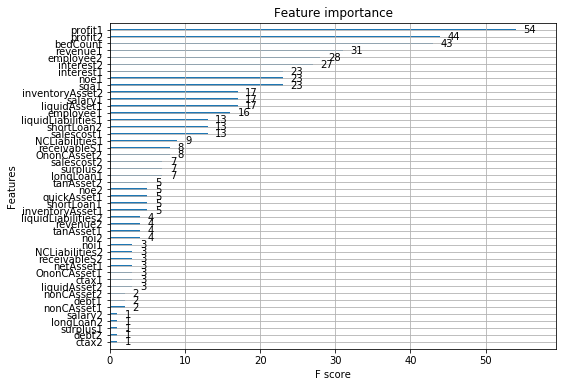

In [83]:
from xgboost import plot_importance
fig,ax=plt.subplots(figsize=(8,6))
plot_importance(xgb_wrapper,ax=ax)

## LGB

In [86]:
from lightgbm import LGBMClassifier

In [85]:
!pip install lightgbm

In [92]:
lgbm_clf = LGBMClassifier(n_estimators=200)
params={
    'num_leaves' : [32,64],
    'max_depth' : [64,128,256],
    'min_child_samples' : [50,100],
    'subsample' : [0.8,1]
}

In [131]:
grid_cv = GridSearchCV(lgbm_clf,param_grid=params,cv=3)
grid_cv.fit(dum_x_train,y_train,early_stopping_rounds=300,eval_metric='auc',
            eval_set=[(dum_x_train,y_train)])

[LightGBM] [Warning] Unknown parameter: min_samples_split
[1]	valid_0's auc: 0.733683	valid_0's binary_logloss: 0.191882
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.800233	valid_0's binary_logloss: 0.184588
[3]	valid_0's auc: 0.799883	valid_0's binary_logloss: 0.180128
[4]	valid_0's auc: 0.800816	valid_0's binary_logloss: 0.178086
[5]	valid_0's auc: 0.80676	valid_0's binary_logloss: 0.17382
[6]	valid_0's auc: 0.827506	valid_0's binary_logloss: 0.16923
[7]	valid_0's auc: 0.829254	valid_0's binary_logloss: 0.166101
[8]	valid_0's auc: 0.839394	valid_0's binary_logloss: 0.162625
[9]	valid_0's auc: 0.844172	valid_0's binary_logloss: 0.158996
[10]	valid_0's auc: 0.865618	valid_0's binary_logloss: 0.151863
[11]	valid_0's auc: 0.867016	valid_0's binary_logloss: 0.150237
[12]	valid_0's auc: 0.86352	valid_0's binary_logloss: 0.146677
[13]	valid_0's auc: 0.861655	valid_0's binary_logloss: 0.144163
[14]	valid_0's auc: 0.863636	valid_0's binary_logloss: 0.1407

[151]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.121242
[152]	valid_0's auc: 0.904079	valid_0's binary_logloss: 0.121437
[153]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.121376
[154]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.121322
[155]	valid_0's auc: 0.905012	valid_0's binary_logloss: 0.12192
[156]	valid_0's auc: 0.905478	valid_0's binary_logloss: 0.121742
[157]	valid_0's auc: 0.904779	valid_0's binary_logloss: 0.122346
[158]	valid_0's auc: 0.904312	valid_0's binary_logloss: 0.122982
[159]	valid_0's auc: 0.904079	valid_0's binary_logloss: 0.12306
[160]	valid_0's auc: 0.904079	valid_0's binary_logloss: 0.123004
[161]	valid_0's auc: 0.904312	valid_0's binary_logloss: 0.123197
[162]	valid_0's auc: 0.904779	valid_0's binary_logloss: 0.123141
[163]	valid_0's auc: 0.904779	valid_0's binary_logloss: 0.123119
[164]	valid_0's auc: 0.904312	valid_0's binary_logloss: 0.123068
[165]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123671
[166]	valid_0's auc: 0.9036

[93]	valid_0's auc: 0.871096	valid_0's binary_logloss: 0.135113
[94]	valid_0's auc: 0.87296	valid_0's binary_logloss: 0.1357
[95]	valid_0's auc: 0.873427	valid_0's binary_logloss: 0.136573
[96]	valid_0's auc: 0.87366	valid_0's binary_logloss: 0.13669
[97]	valid_0's auc: 0.872727	valid_0's binary_logloss: 0.137337
[98]	valid_0's auc: 0.872261	valid_0's binary_logloss: 0.138627
[99]	valid_0's auc: 0.870862	valid_0's binary_logloss: 0.138979
[100]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.139533
[101]	valid_0's auc: 0.872261	valid_0's binary_logloss: 0.140255
[102]	valid_0's auc: 0.871795	valid_0's binary_logloss: 0.141558
[103]	valid_0's auc: 0.870396	valid_0's binary_logloss: 0.14321
[104]	valid_0's auc: 0.871096	valid_0's binary_logloss: 0.1433
[105]	valid_0's auc: 0.872494	valid_0's binary_logloss: 0.143866
[106]	valid_0's auc: 0.874126	valid_0's binary_logloss: 0.144402
[107]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.145975
[108]	valid_0's auc: 0.872727	valid_0's 

[26]	valid_0's auc: 0.965385	valid_0's binary_logloss: 0.101349
[27]	valid_0's auc: 0.964685	valid_0's binary_logloss: 0.0999406
[28]	valid_0's auc: 0.964452	valid_0's binary_logloss: 0.0992125
[29]	valid_0's auc: 0.964452	valid_0's binary_logloss: 0.0980994
[30]	valid_0's auc: 0.963753	valid_0's binary_logloss: 0.097566
[31]	valid_0's auc: 0.962354	valid_0's binary_logloss: 0.0971416
[32]	valid_0's auc: 0.961422	valid_0's binary_logloss: 0.0960534
[33]	valid_0's auc: 0.96352	valid_0's binary_logloss: 0.0948176
[34]	valid_0's auc: 0.96352	valid_0's binary_logloss: 0.0940019
[35]	valid_0's auc: 0.96352	valid_0's binary_logloss: 0.0935948
[36]	valid_0's auc: 0.963986	valid_0's binary_logloss: 0.0912637
[37]	valid_0's auc: 0.965851	valid_0's binary_logloss: 0.0909594
[38]	valid_0's auc: 0.965385	valid_0's binary_logloss: 0.0906062
[39]	valid_0's auc: 0.966084	valid_0's binary_logloss: 0.0891249
[40]	valid_0's auc: 0.964685	valid_0's binary_logloss: 0.0889919
[41]	valid_0's auc: 0.967016	v

[LightGBM] [Warning] Unknown parameter: min_samples_split
[1]	valid_0's auc: 0.733683	valid_0's binary_logloss: 0.191882
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.800233	valid_0's binary_logloss: 0.184588
[3]	valid_0's auc: 0.799883	valid_0's binary_logloss: 0.180128
[4]	valid_0's auc: 0.800816	valid_0's binary_logloss: 0.178086
[5]	valid_0's auc: 0.80676	valid_0's binary_logloss: 0.17382
[6]	valid_0's auc: 0.827506	valid_0's binary_logloss: 0.16923
[7]	valid_0's auc: 0.829254	valid_0's binary_logloss: 0.166101
[8]	valid_0's auc: 0.839394	valid_0's binary_logloss: 0.162625
[9]	valid_0's auc: 0.844172	valid_0's binary_logloss: 0.158996
[10]	valid_0's auc: 0.865618	valid_0's binary_logloss: 0.151863
[11]	valid_0's auc: 0.867016	valid_0's binary_logloss: 0.150237
[12]	valid_0's auc: 0.86352	valid_0's binary_logloss: 0.146677
[13]	valid_0's auc: 0.861655	valid_0's binary_logloss: 0.144163
[14]	valid_0's auc: 0.863636	valid_0's binary_logloss: 0.1407

[171]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123627
[172]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123661
[173]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123639
[174]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123673
[175]	valid_0's auc: 0.903846	valid_0's binary_logloss: 0.123651
[176]	valid_0's auc: 0.903846	valid_0's binary_logloss: 0.123684
[177]	valid_0's auc: 0.903846	valid_0's binary_logloss: 0.123663
[178]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123857
[179]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.123926
[180]	valid_0's auc: 0.904312	valid_0's binary_logloss: 0.123905
[181]	valid_0's auc: 0.904312	valid_0's binary_logloss: 0.123938
[182]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.123917
[183]	valid_0's auc: 0.904312	valid_0's binary_logloss: 0.124553
[184]	valid_0's auc: 0.904312	valid_0's binary_logloss: 0.125149
[185]	valid_0's auc: 0.904079	valid_0's binary_logloss: 0.125663
[186]	valid_0's auc: 0.90

[99]	valid_0's auc: 0.870862	valid_0's binary_logloss: 0.138979
[100]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.139533
[101]	valid_0's auc: 0.872261	valid_0's binary_logloss: 0.140255
[102]	valid_0's auc: 0.871795	valid_0's binary_logloss: 0.141558
[103]	valid_0's auc: 0.870396	valid_0's binary_logloss: 0.14321
[104]	valid_0's auc: 0.871096	valid_0's binary_logloss: 0.1433
[105]	valid_0's auc: 0.872494	valid_0's binary_logloss: 0.143866
[106]	valid_0's auc: 0.874126	valid_0's binary_logloss: 0.144402
[107]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.145975
[108]	valid_0's auc: 0.872727	valid_0's binary_logloss: 0.146374
[109]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.147686
[110]	valid_0's auc: 0.871562	valid_0's binary_logloss: 0.149346
[111]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.149477
[112]	valid_0's auc: 0.872028	valid_0's binary_logloss: 0.151085
[113]	valid_0's auc: 0.871562	valid_0's binary_logloss: 0.151737
[114]	valid_0's auc: 0.870163

[26]	valid_0's auc: 0.965385	valid_0's binary_logloss: 0.101349
[27]	valid_0's auc: 0.964685	valid_0's binary_logloss: 0.0999406
[28]	valid_0's auc: 0.964452	valid_0's binary_logloss: 0.0992125
[29]	valid_0's auc: 0.964452	valid_0's binary_logloss: 0.0980994
[30]	valid_0's auc: 0.963753	valid_0's binary_logloss: 0.097566
[31]	valid_0's auc: 0.962354	valid_0's binary_logloss: 0.0971416
[32]	valid_0's auc: 0.961422	valid_0's binary_logloss: 0.0960534
[33]	valid_0's auc: 0.96352	valid_0's binary_logloss: 0.0948176
[34]	valid_0's auc: 0.96352	valid_0's binary_logloss: 0.0940019
[35]	valid_0's auc: 0.96352	valid_0's binary_logloss: 0.0935948
[36]	valid_0's auc: 0.963986	valid_0's binary_logloss: 0.0912637
[37]	valid_0's auc: 0.965851	valid_0's binary_logloss: 0.0909594
[38]	valid_0's auc: 0.965385	valid_0's binary_logloss: 0.0906062
[39]	valid_0's auc: 0.966084	valid_0's binary_logloss: 0.0891249
[40]	valid_0's auc: 0.964685	valid_0's binary_logloss: 0.0889919
[41]	valid_0's auc: 0.967016	v

[186]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[187]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[188]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[189]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[190]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[191]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[192]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[193]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[194]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[195]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[196]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[197]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[198]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[199]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
[200]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.129663
Did not meet early stoppi

[159]	valid_0's auc: 0.904079	valid_0's binary_logloss: 0.12306
[160]	valid_0's auc: 0.904079	valid_0's binary_logloss: 0.123004
[161]	valid_0's auc: 0.904312	valid_0's binary_logloss: 0.123197
[162]	valid_0's auc: 0.904779	valid_0's binary_logloss: 0.123141
[163]	valid_0's auc: 0.904779	valid_0's binary_logloss: 0.123119
[164]	valid_0's auc: 0.904312	valid_0's binary_logloss: 0.123068
[165]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123671
[166]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123666
[167]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123643
[168]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123677
[169]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123655
[170]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123649
[171]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123627
[172]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123661
[173]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.123639
[174]	valid_0's auc: 0.903

[92]	valid_0's auc: 0.871329	valid_0's binary_logloss: 0.134603
[93]	valid_0's auc: 0.871096	valid_0's binary_logloss: 0.135113
[94]	valid_0's auc: 0.87296	valid_0's binary_logloss: 0.1357
[95]	valid_0's auc: 0.873427	valid_0's binary_logloss: 0.136573
[96]	valid_0's auc: 0.87366	valid_0's binary_logloss: 0.13669
[97]	valid_0's auc: 0.872727	valid_0's binary_logloss: 0.137337
[98]	valid_0's auc: 0.872261	valid_0's binary_logloss: 0.138627
[99]	valid_0's auc: 0.870862	valid_0's binary_logloss: 0.138979
[100]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.139533
[101]	valid_0's auc: 0.872261	valid_0's binary_logloss: 0.140255
[102]	valid_0's auc: 0.871795	valid_0's binary_logloss: 0.141558
[103]	valid_0's auc: 0.870396	valid_0's binary_logloss: 0.14321
[104]	valid_0's auc: 0.871096	valid_0's binary_logloss: 0.1433
[105]	valid_0's auc: 0.872494	valid_0's binary_logloss: 0.143866
[106]	valid_0's auc: 0.874126	valid_0's binary_logloss: 0.144402
[107]	valid_0's auc: 0.873193	valid_0's b

[27]	valid_0's auc: 0.964685	valid_0's binary_logloss: 0.0999406
[28]	valid_0's auc: 0.964452	valid_0's binary_logloss: 0.0992125
[29]	valid_0's auc: 0.964452	valid_0's binary_logloss: 0.0980994
[30]	valid_0's auc: 0.963753	valid_0's binary_logloss: 0.097566
[31]	valid_0's auc: 0.962354	valid_0's binary_logloss: 0.0971416
[32]	valid_0's auc: 0.961422	valid_0's binary_logloss: 0.0960534
[33]	valid_0's auc: 0.96352	valid_0's binary_logloss: 0.0948176
[34]	valid_0's auc: 0.96352	valid_0's binary_logloss: 0.0940019
[35]	valid_0's auc: 0.96352	valid_0's binary_logloss: 0.0935948
[36]	valid_0's auc: 0.963986	valid_0's binary_logloss: 0.0912637
[37]	valid_0's auc: 0.965851	valid_0's binary_logloss: 0.0909594
[38]	valid_0's auc: 0.965385	valid_0's binary_logloss: 0.0906062
[39]	valid_0's auc: 0.966084	valid_0's binary_logloss: 0.0891249
[40]	valid_0's auc: 0.964685	valid_0's binary_logloss: 0.0889919
[41]	valid_0's auc: 0.967016	valid_0's binary_logloss: 0.0883042
[42]	valid_0's auc: 0.967483	

[LightGBM] [Warning] Unknown parameter: min_samples_split
[1]	valid_0's auc: 0.733683	valid_0's binary_logloss: 0.191882
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.800233	valid_0's binary_logloss: 0.184588
[3]	valid_0's auc: 0.799883	valid_0's binary_logloss: 0.180128
[4]	valid_0's auc: 0.800816	valid_0's binary_logloss: 0.178086
[5]	valid_0's auc: 0.80676	valid_0's binary_logloss: 0.17382
[6]	valid_0's auc: 0.827506	valid_0's binary_logloss: 0.16923
[7]	valid_0's auc: 0.829254	valid_0's binary_logloss: 0.166101
[8]	valid_0's auc: 0.839394	valid_0's binary_logloss: 0.162625
[9]	valid_0's auc: 0.844172	valid_0's binary_logloss: 0.158996
[10]	valid_0's auc: 0.865618	valid_0's binary_logloss: 0.151863
[11]	valid_0's auc: 0.867016	valid_0's binary_logloss: 0.150237
[12]	valid_0's auc: 0.86352	valid_0's binary_logloss: 0.146677
[13]	valid_0's auc: 0.861655	valid_0's binary_logloss: 0.144163
[14]	valid_0's auc: 0.863636	valid_0's binary_logloss: 0.1407

[196]	valid_0's auc: 0.902448	valid_0's binary_logloss: 0.12831
[197]	valid_0's auc: 0.902448	valid_0's binary_logloss: 0.128305
[198]	valid_0's auc: 0.90338	valid_0's binary_logloss: 0.12885
[199]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.128845
[200]	valid_0's auc: 0.903613	valid_0's binary_logloss: 0.12874
Did not meet early stopping. Best iteration is:
[49]	valid_0's auc: 0.915501	valid_0's binary_logloss: 0.0992629
[LightGBM] [Warning] Unknown parameter: min_samples_split
[1]	valid_0's auc: 0.783333	valid_0's binary_logloss: 0.187432
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.854895	valid_0's binary_logloss: 0.174044
[3]	valid_0's auc: 0.861888	valid_0's binary_logloss: 0.166766
[4]	valid_0's auc: 0.894988	valid_0's binary_logloss: 0.158042
[5]	valid_0's auc: 0.884848	valid_0's binary_logloss: 0.152414
[6]	valid_0's auc: 0.885082	valid_0's binary_logloss: 0.147576
[7]	valid_0's auc: 0.880303	valid_0's binary_logloss: 0.143899
[8]	v

[137]	valid_0's auc: 0.8662	valid_0's binary_logloss: 0.175432
[138]	valid_0's auc: 0.866434	valid_0's binary_logloss: 0.176566
[139]	valid_0's auc: 0.8662	valid_0's binary_logloss: 0.177184
[140]	valid_0's auc: 0.865268	valid_0's binary_logloss: 0.178447
[141]	valid_0's auc: 0.866667	valid_0's binary_logloss: 0.178072
[142]	valid_0's auc: 0.867366	valid_0's binary_logloss: 0.178552
[143]	valid_0's auc: 0.867832	valid_0's binary_logloss: 0.179316
[144]	valid_0's auc: 0.865967	valid_0's binary_logloss: 0.180782
[145]	valid_0's auc: 0.865967	valid_0's binary_logloss: 0.181827
[146]	valid_0's auc: 0.865967	valid_0's binary_logloss: 0.182546
[147]	valid_0's auc: 0.866434	valid_0's binary_logloss: 0.183611
[148]	valid_0's auc: 0.863636	valid_0's binary_logloss: 0.184912
[149]	valid_0's auc: 0.862704	valid_0's binary_logloss: 0.185861
[150]	valid_0's auc: 0.863636	valid_0's binary_logloss: 0.186406
[151]	valid_0's auc: 0.864336	valid_0's binary_logloss: 0.187058
[152]	valid_0's auc: 0.863403

[94]	valid_0's auc: 0.971911	valid_0's binary_logloss: 0.0958514
[95]	valid_0's auc: 0.971212	valid_0's binary_logloss: 0.0962642
[96]	valid_0's auc: 0.971911	valid_0's binary_logloss: 0.0968452
[97]	valid_0's auc: 0.971445	valid_0's binary_logloss: 0.0979104
[98]	valid_0's auc: 0.971212	valid_0's binary_logloss: 0.0988946
[99]	valid_0's auc: 0.971678	valid_0's binary_logloss: 0.0995242
[100]	valid_0's auc: 0.970513	valid_0's binary_logloss: 0.101555
[101]	valid_0's auc: 0.970979	valid_0's binary_logloss: 0.101231
[102]	valid_0's auc: 0.970979	valid_0's binary_logloss: 0.101899
[103]	valid_0's auc: 0.971212	valid_0's binary_logloss: 0.102352
[104]	valid_0's auc: 0.971445	valid_0's binary_logloss: 0.102826
[105]	valid_0's auc: 0.970979	valid_0's binary_logloss: 0.103916
[106]	valid_0's auc: 0.971445	valid_0's binary_logloss: 0.1035
[107]	valid_0's auc: 0.971212	valid_0's binary_logloss: 0.103677
[108]	valid_0's auc: 0.971678	valid_0's binary_logloss: 0.104055
[109]	valid_0's auc: 0.9716

[18]	valid_0's auc: 0.890559	valid_0's binary_logloss: 0.130405
[19]	valid_0's auc: 0.888112	valid_0's binary_logloss: 0.128176
[20]	valid_0's auc: 0.890909	valid_0's binary_logloss: 0.125623
[21]	valid_0's auc: 0.887179	valid_0's binary_logloss: 0.124262
[22]	valid_0's auc: 0.895804	valid_0's binary_logloss: 0.120618
[23]	valid_0's auc: 0.89627	valid_0's binary_logloss: 0.118414
[24]	valid_0's auc: 0.898368	valid_0's binary_logloss: 0.116159
[25]	valid_0's auc: 0.902214	valid_0's binary_logloss: 0.113317
[26]	valid_0's auc: 0.901282	valid_0's binary_logloss: 0.111429
[27]	valid_0's auc: 0.902448	valid_0's binary_logloss: 0.109354
[28]	valid_0's auc: 0.907343	valid_0's binary_logloss: 0.10717
[29]	valid_0's auc: 0.90641	valid_0's binary_logloss: 0.107156
[30]	valid_0's auc: 0.910373	valid_0's binary_logloss: 0.10482
[31]	valid_0's auc: 0.909674	valid_0's binary_logloss: 0.10361
[32]	valid_0's auc: 0.908741	valid_0's binary_logloss: 0.102447
[33]	valid_0's auc: 0.905711	valid_0's binary

[192]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.138548
[193]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.138812
[194]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.138791
[195]	valid_0's auc: 0.875058	valid_0's binary_logloss: 0.13853
[196]	valid_0's auc: 0.875058	valid_0's binary_logloss: 0.138509
[197]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.138501
[198]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.13848
[199]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.138472
[200]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.138451
Did not meet early stopping. Best iteration is:
[37]	valid_0's auc: 0.911189	valid_0's binary_logloss: 0.0988394
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.783333	valid_0's binary_logloss: 0.187432
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 

[120]	valid_0's auc: 0.872494	valid_0's binary_logloss: 0.165072
[121]	valid_0's auc: 0.872727	valid_0's binary_logloss: 0.165788
[122]	valid_0's auc: 0.874126	valid_0's binary_logloss: 0.166356
[123]	valid_0's auc: 0.87366	valid_0's binary_logloss: 0.167698
[124]	valid_0's auc: 0.873893	valid_0's binary_logloss: 0.169234
[125]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.169641
[126]	valid_0's auc: 0.874359	valid_0's binary_logloss: 0.171031
[127]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.171344
[128]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.172692
[129]	valid_0's auc: 0.874126	valid_0's binary_logloss: 0.174024
[130]	valid_0's auc: 0.874359	valid_0's binary_logloss: 0.175537
[131]	valid_0's auc: 0.874359	valid_0's binary_logloss: 0.176444
[132]	valid_0's auc: 0.872727	valid_0's binary_logloss: 0.177372
[133]	valid_0's auc: 0.872727	valid_0's binary_logloss: 0.178296
[134]	valid_0's auc: 0.872261	valid_0's binary_logloss: 0.179575
[135]	valid_0's auc: 0.872

[80]	valid_0's auc: 0.97296	valid_0's binary_logloss: 0.0888436
[81]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0897131
[82]	valid_0's auc: 0.971795	valid_0's binary_logloss: 0.0903568
[83]	valid_0's auc: 0.971795	valid_0's binary_logloss: 0.091021
[84]	valid_0's auc: 0.972028	valid_0's binary_logloss: 0.090629
[85]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0911746
[86]	valid_0's auc: 0.971795	valid_0's binary_logloss: 0.0925593
[87]	valid_0's auc: 0.972028	valid_0's binary_logloss: 0.09314
[88]	valid_0's auc: 0.971562	valid_0's binary_logloss: 0.0934571
[89]	valid_0's auc: 0.970862	valid_0's binary_logloss: 0.0941406
[90]	valid_0's auc: 0.970396	valid_0's binary_logloss: 0.0954002
[91]	valid_0's auc: 0.970163	valid_0's binary_logloss: 0.0951289
[92]	valid_0's auc: 0.968998	valid_0's binary_logloss: 0.0963915
[93]	valid_0's auc: 0.969464	valid_0's binary_logloss: 0.0960479
[94]	valid_0's auc: 0.968065	valid_0's binary_logloss: 0.0967866
[95]	valid_0's auc: 0.968765	v

[25]	valid_0's auc: 0.902214	valid_0's binary_logloss: 0.113317
[26]	valid_0's auc: 0.901282	valid_0's binary_logloss: 0.111429
[27]	valid_0's auc: 0.902448	valid_0's binary_logloss: 0.109354
[28]	valid_0's auc: 0.907343	valid_0's binary_logloss: 0.10717
[29]	valid_0's auc: 0.90641	valid_0's binary_logloss: 0.107156
[30]	valid_0's auc: 0.910373	valid_0's binary_logloss: 0.10482
[31]	valid_0's auc: 0.909674	valid_0's binary_logloss: 0.10361
[32]	valid_0's auc: 0.908741	valid_0's binary_logloss: 0.102447
[33]	valid_0's auc: 0.905711	valid_0's binary_logloss: 0.10227
[34]	valid_0's auc: 0.908275	valid_0's binary_logloss: 0.101273
[35]	valid_0's auc: 0.906993	valid_0's binary_logloss: 0.101558
[36]	valid_0's auc: 0.909557	valid_0's binary_logloss: 0.100135
[37]	valid_0's auc: 0.911189	valid_0's binary_logloss: 0.0988394
[38]	valid_0's auc: 0.907226	valid_0's binary_logloss: 0.0988065
[39]	valid_0's auc: 0.904429	valid_0's binary_logloss: 0.0995874
[40]	valid_0's auc: 0.907226	valid_0's bin

[179]	valid_0's auc: 0.87669	valid_0's binary_logloss: 0.137176
[180]	valid_0's auc: 0.876923	valid_0's binary_logloss: 0.137153
[181]	valid_0's auc: 0.876923	valid_0's binary_logloss: 0.137144
[182]	valid_0's auc: 0.876923	valid_0's binary_logloss: 0.137121
[183]	valid_0's auc: 0.87669	valid_0's binary_logloss: 0.137112
[184]	valid_0's auc: 0.87669	valid_0's binary_logloss: 0.13709
[185]	valid_0's auc: 0.875991	valid_0's binary_logloss: 0.137692
[186]	valid_0's auc: 0.875291	valid_0's binary_logloss: 0.137949
[187]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.138627
[188]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.138605
[189]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.138598
[190]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.138576
[191]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.138569
[192]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.138548
[193]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.138812
[194]	valid_0's auc: 0.874592

[131]	valid_0's auc: 0.874359	valid_0's binary_logloss: 0.176444
[132]	valid_0's auc: 0.872727	valid_0's binary_logloss: 0.177372
[133]	valid_0's auc: 0.872727	valid_0's binary_logloss: 0.178296
[134]	valid_0's auc: 0.872261	valid_0's binary_logloss: 0.179575
[135]	valid_0's auc: 0.872494	valid_0's binary_logloss: 0.180426
[136]	valid_0's auc: 0.872261	valid_0's binary_logloss: 0.18125
[137]	valid_0's auc: 0.871795	valid_0's binary_logloss: 0.182909
[138]	valid_0's auc: 0.870629	valid_0's binary_logloss: 0.184204
[139]	valid_0's auc: 0.871096	valid_0's binary_logloss: 0.185558
[140]	valid_0's auc: 0.871096	valid_0's binary_logloss: 0.186484
[141]	valid_0's auc: 0.870163	valid_0's binary_logloss: 0.187508
[142]	valid_0's auc: 0.869464	valid_0's binary_logloss: 0.188446
[143]	valid_0's auc: 0.870629	valid_0's binary_logloss: 0.188659
[144]	valid_0's auc: 0.870163	valid_0's binary_logloss: 0.189901
[145]	valid_0's auc: 0.869464	valid_0's binary_logloss: 0.191697
[146]	valid_0's auc: 0.868

[62]	valid_0's auc: 0.971562	valid_0's binary_logloss: 0.0825138
[63]	valid_0's auc: 0.971329	valid_0's binary_logloss: 0.0830316
[64]	valid_0's auc: 0.970629	valid_0's binary_logloss: 0.0834738
[65]	valid_0's auc: 0.970629	valid_0's binary_logloss: 0.0838202
[66]	valid_0's auc: 0.971096	valid_0's binary_logloss: 0.0843504
[67]	valid_0's auc: 0.971795	valid_0's binary_logloss: 0.084516
[68]	valid_0's auc: 0.971329	valid_0's binary_logloss: 0.0857938
[69]	valid_0's auc: 0.971562	valid_0's binary_logloss: 0.0867229
[70]	valid_0's auc: 0.971096	valid_0's binary_logloss: 0.0868761
[71]	valid_0's auc: 0.971096	valid_0's binary_logloss: 0.0870618
[72]	valid_0's auc: 0.971329	valid_0's binary_logloss: 0.0880423
[73]	valid_0's auc: 0.971096	valid_0's binary_logloss: 0.088228
[74]	valid_0's auc: 0.971329	valid_0's binary_logloss: 0.0877705
[75]	valid_0's auc: 0.971096	valid_0's binary_logloss: 0.0882489
[76]	valid_0's auc: 0.970862	valid_0's binary_logloss: 0.0882648
[77]	valid_0's auc: 0.97156

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.733683	valid_0's binary_logloss: 0.191882
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.790326	valid_0's binary_logloss: 0.184588
[3]	valid_0's auc: 0.789977	valid_0's binary_logloss: 0.180129
[4]	valid_0's auc: 0.793823	valid_0's binary_logloss: 0.178088
[5]	valid_0's auc: 0.801865	valid_0's binary_logloss: 0.173821
[6]	valid_0's auc: 0.823893	valid_0's binary_logloss: 0.16923
[7]	valid_0's auc: 0.826107	valid_0's binary_logloss: 0.166101
[8]	valid_0's auc: 0.838578	valid_0's binary_logloss: 0.162625
[9]	valid_0's auc: 0.841958	valid_0's binary_logloss: 0.159062
[10]	valid_0's auc: 0.867016	valid_0's binary_logloss: 0.151914
[11]	valid_0's auc: 0.872844	valid_0's binary_logloss: 0.149517
[12]	valid_0's auc: 0.87028	valid_0's binary_logloss: 0.146098
[13]	valid_0's auc: 0

[135]	valid_0's auc: 0.878089	valid_0's binary_logloss: 0.130867
[136]	valid_0's auc: 0.875991	valid_0's binary_logloss: 0.131493
[137]	valid_0's auc: 0.875991	valid_0's binary_logloss: 0.131472
[138]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.131815
[139]	valid_0's auc: 0.877389	valid_0's binary_logloss: 0.131872
[140]	valid_0's auc: 0.875991	valid_0's binary_logloss: 0.132228
[141]	valid_0's auc: 0.875758	valid_0's binary_logloss: 0.132281
[142]	valid_0's auc: 0.875291	valid_0's binary_logloss: 0.132787
[143]	valid_0's auc: 0.875291	valid_0's binary_logloss: 0.132808
[144]	valid_0's auc: 0.875291	valid_0's binary_logloss: 0.132749
[145]	valid_0's auc: 0.874126	valid_0's binary_logloss: 0.133377
[146]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.134136
[147]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.134157
[148]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.134139
[149]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.134378
[150]	valid_0's auc: 0.87

[71]	valid_0's auc: 0.879487	valid_0's binary_logloss: 0.117975
[72]	valid_0's auc: 0.880186	valid_0's binary_logloss: 0.119088
[73]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.119081
[74]	valid_0's auc: 0.87972	valid_0's binary_logloss: 0.120527
[75]	valid_0's auc: 0.876923	valid_0's binary_logloss: 0.121939
[76]	valid_0's auc: 0.875758	valid_0's binary_logloss: 0.123041
[77]	valid_0's auc: 0.877389	valid_0's binary_logloss: 0.12418
[78]	valid_0's auc: 0.876457	valid_0's binary_logloss: 0.124599
[79]	valid_0's auc: 0.87669	valid_0's binary_logloss: 0.12569
[80]	valid_0's auc: 0.877156	valid_0's binary_logloss: 0.126103
[81]	valid_0's auc: 0.875291	valid_0's binary_logloss: 0.127533
[82]	valid_0's auc: 0.875291	valid_0's binary_logloss: 0.128752
[83]	valid_0's auc: 0.875758	valid_0's binary_logloss: 0.129861
[84]	valid_0's auc: 0.876457	valid_0's binary_logloss: 0.131035
[85]	valid_0's auc: 0.874126	valid_0's binary_logloss: 0.132389
[86]	valid_0's auc: 0.87296	valid_0's binary

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.796853	valid_0's binary_logloss: 0.189944
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.820163	valid_0's binary_logloss: 0.184066
[3]	valid_0's auc: 0.884615	valid_0's binary_logloss: 0.175615
[4]	valid_0's auc: 0.912471	valid_0's binary_logloss: 0.16952
[5]	valid_0's auc: 0.912471	valid_0's binary_logloss: 0.165376
[6]	valid_0's auc: 0.920629	valid_0's binary_logloss: 0.159955
[7]	valid_0's auc: 0.935897	valid_0's binary_logloss: 0.152218
[8]	valid_0's auc: 0.938345	valid_0's binary_logloss: 0.148183
[9]	valid_0's auc: 0.942075	valid_0's binary_logloss: 0.144532
[10]	valid_0's auc: 0.945105	valid_0's binary_logloss: 0.14059
[11]	valid_0's auc: 0.946503	valid_0's binary_logloss: 0.135949
[12]	valid_0's auc: 0.951981	valid_0's binary_logloss: 0.132332
[13]	valid_0's auc: 0

[128]	valid_0's auc: 0.967133	valid_0's binary_logloss: 0.108761
[129]	valid_0's auc: 0.967133	valid_0's binary_logloss: 0.109497
[130]	valid_0's auc: 0.967366	valid_0's binary_logloss: 0.109918
[131]	valid_0's auc: 0.968298	valid_0's binary_logloss: 0.109153
[132]	valid_0's auc: 0.968065	valid_0's binary_logloss: 0.109322
[133]	valid_0's auc: 0.967366	valid_0's binary_logloss: 0.110004
[134]	valid_0's auc: 0.967599	valid_0's binary_logloss: 0.110736
[135]	valid_0's auc: 0.968298	valid_0's binary_logloss: 0.112055
[136]	valid_0's auc: 0.968298	valid_0's binary_logloss: 0.11306
[137]	valid_0's auc: 0.968065	valid_0's binary_logloss: 0.113835
[138]	valid_0's auc: 0.968531	valid_0's binary_logloss: 0.115167
[139]	valid_0's auc: 0.967366	valid_0's binary_logloss: 0.117529
[140]	valid_0's auc: 0.967133	valid_0's binary_logloss: 0.11856
[141]	valid_0's auc: 0.967133	valid_0's binary_logloss: 0.119374
[142]	valid_0's auc: 0.967366	valid_0's binary_logloss: 0.11956
[143]	valid_0's auc: 0.96759

[77]	valid_0's auc: 0.903263	valid_0's binary_logloss: 0.108077
[78]	valid_0's auc: 0.90373	valid_0's binary_logloss: 0.107967
[79]	valid_0's auc: 0.904429	valid_0's binary_logloss: 0.10783
[80]	valid_0's auc: 0.901632	valid_0's binary_logloss: 0.109248
[81]	valid_0's auc: 0.900466	valid_0's binary_logloss: 0.109604
[82]	valid_0's auc: 0.898135	valid_0's binary_logloss: 0.111048
[83]	valid_0's auc: 0.899068	valid_0's binary_logloss: 0.111559
[84]	valid_0's auc: 0.898834	valid_0's binary_logloss: 0.111717
[85]	valid_0's auc: 0.899534	valid_0's binary_logloss: 0.112241
[86]	valid_0's auc: 0.897902	valid_0's binary_logloss: 0.113725
[87]	valid_0's auc: 0.895338	valid_0's binary_logloss: 0.114296
[88]	valid_0's auc: 0.896037	valid_0's binary_logloss: 0.114676
[89]	valid_0's auc: 0.893706	valid_0's binary_logloss: 0.115212
[90]	valid_0's auc: 0.894639	valid_0's binary_logloss: 0.115783
[91]	valid_0's auc: 0.892774	valid_0's binary_logloss: 0.11656
[92]	valid_0's auc: 0.893007	valid_0's bina

[1]	valid_0's auc: 0.783333	valid_0's binary_logloss: 0.187432
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.854895	valid_0's binary_logloss: 0.174044
[3]	valid_0's auc: 0.861888	valid_0's binary_logloss: 0.166766
[4]	valid_0's auc: 0.893823	valid_0's binary_logloss: 0.158041
[5]	valid_0's auc: 0.885198	valid_0's binary_logloss: 0.152413
[6]	valid_0's auc: 0.885431	valid_0's binary_logloss: 0.147576
[7]	valid_0's auc: 0.882051	valid_0's binary_logloss: 0.143899
[8]	valid_0's auc: 0.88345	valid_0's binary_logloss: 0.137391
[9]	valid_0's auc: 0.884615	valid_0's binary_logloss: 0.134136
[10]	valid_0's auc: 0.878438	valid_0's binary_logloss: 0.132029
[11]	valid_0's auc: 0.875758	valid_0's binary_logloss: 0.126929
[12]	valid_0's auc: 0.87634	valid_0's binary_logloss: 0.125115
[13]	valid_0's auc: 0.871445	valid_0's binary_logloss: 0.122835
[14]	valid_0's auc: 0.868998	valid_0's binary_logloss: 0.121922
[15]	valid_0's auc: 0.868065	valid_0's binary_logloss

[145]	valid_0's auc: 0.869464	valid_0's binary_logloss: 0.191697
[146]	valid_0's auc: 0.868765	valid_0's binary_logloss: 0.19266
[147]	valid_0's auc: 0.867832	valid_0's binary_logloss: 0.19361
[148]	valid_0's auc: 0.869231	valid_0's binary_logloss: 0.193801
[149]	valid_0's auc: 0.869231	valid_0's binary_logloss: 0.194336
[150]	valid_0's auc: 0.868531	valid_0's binary_logloss: 0.195651
[151]	valid_0's auc: 0.869231	valid_0's binary_logloss: 0.196917
[152]	valid_0's auc: 0.870163	valid_0's binary_logloss: 0.197819
[153]	valid_0's auc: 0.870163	valid_0's binary_logloss: 0.198775
[154]	valid_0's auc: 0.870163	valid_0's binary_logloss: 0.199545
[155]	valid_0's auc: 0.870163	valid_0's binary_logloss: 0.200945
[156]	valid_0's auc: 0.870396	valid_0's binary_logloss: 0.20212
[157]	valid_0's auc: 0.868531	valid_0's binary_logloss: 0.203384
[158]	valid_0's auc: 0.868298	valid_0's binary_logloss: 0.204815
[159]	valid_0's auc: 0.867832	valid_0's binary_logloss: 0.206093
[160]	valid_0's auc: 0.86573

[70]	valid_0's auc: 0.971096	valid_0's binary_logloss: 0.0868761
[71]	valid_0's auc: 0.971096	valid_0's binary_logloss: 0.0870618
[72]	valid_0's auc: 0.971329	valid_0's binary_logloss: 0.0880423
[73]	valid_0's auc: 0.971096	valid_0's binary_logloss: 0.088228
[74]	valid_0's auc: 0.971329	valid_0's binary_logloss: 0.0877705
[75]	valid_0's auc: 0.971096	valid_0's binary_logloss: 0.0882489
[76]	valid_0's auc: 0.970862	valid_0's binary_logloss: 0.0882648
[77]	valid_0's auc: 0.971562	valid_0's binary_logloss: 0.088421
[78]	valid_0's auc: 0.97296	valid_0's binary_logloss: 0.0876272
[79]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0884918
[80]	valid_0's auc: 0.97296	valid_0's binary_logloss: 0.0888436
[81]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0897131
[82]	valid_0's auc: 0.971795	valid_0's binary_logloss: 0.0903568
[83]	valid_0's auc: 0.971795	valid_0's binary_logloss: 0.091021
[84]	valid_0's auc: 0.972028	valid_0's binary_logloss: 0.090629
[85]	valid_0's auc: 0.972727	va

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.733683	valid_0's binary_logloss: 0.191882
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.790326	valid_0's binary_logloss: 0.184588
[3]	valid_0's auc: 0.78986	valid_0's binary_logloss: 0.180129
[4]	valid_0's auc: 0.793823	valid_0's binary_logloss: 0.178087
[5]	valid_0's auc: 0.802564	valid_0's binary_logloss: 0.17382
[6]	valid_0's auc: 0.824592	valid_0's binary_logloss: 0.16923
[7]	valid_0's auc: 0.826807	valid_0's binary_logloss: 0.1661
[8]	valid_0's auc: 0.838345	valid_0's binary_logloss: 0.162624
[9]	valid_0's auc: 0.840093	valid_0's binary_logloss: 0.159058
[10]	valid_0's auc: 0.866783	valid_0's binary_logloss: 0.151911
[11]	valid_0's auc: 0.872844	valid_0's binary_logloss: 0.149513
[12]	valid_0's auc: 0.87028	valid_0's binary_logloss: 0.146092
[13]	valid_0's auc: 0.868

[127]	valid_0's auc: 0.885315	valid_0's binary_logloss: 0.125768
[128]	valid_0's auc: 0.885315	valid_0's binary_logloss: 0.125757
[129]	valid_0's auc: 0.884848	valid_0's binary_logloss: 0.125711
[130]	valid_0's auc: 0.885315	valid_0's binary_logloss: 0.12593
[131]	valid_0's auc: 0.885315	valid_0's binary_logloss: 0.125918
[132]	valid_0's auc: 0.885082	valid_0's binary_logloss: 0.125871
[133]	valid_0's auc: 0.884382	valid_0's binary_logloss: 0.125863
[134]	valid_0's auc: 0.885315	valid_0's binary_logloss: 0.126082
[135]	valid_0's auc: 0.885315	valid_0's binary_logloss: 0.126034
[136]	valid_0's auc: 0.885315	valid_0's binary_logloss: 0.126025
[137]	valid_0's auc: 0.883916	valid_0's binary_logloss: 0.126649
[138]	valid_0's auc: 0.883916	valid_0's binary_logloss: 0.126662
[139]	valid_0's auc: 0.884382	valid_0's binary_logloss: 0.126674
[140]	valid_0's auc: 0.883916	valid_0's binary_logloss: 0.126415
[141]	valid_0's auc: 0.883217	valid_0's binary_logloss: 0.127027
[142]	valid_0's auc: 0.883

[75]	valid_0's auc: 0.866667	valid_0's binary_logloss: 0.126136
[76]	valid_0's auc: 0.865967	valid_0's binary_logloss: 0.127042
[77]	valid_0's auc: 0.865967	valid_0's binary_logloss: 0.127527
[78]	valid_0's auc: 0.868998	valid_0's binary_logloss: 0.128609
[79]	valid_0's auc: 0.868298	valid_0's binary_logloss: 0.129372
[80]	valid_0's auc: 0.86993	valid_0's binary_logloss: 0.130221
[81]	valid_0's auc: 0.871329	valid_0's binary_logloss: 0.131321
[82]	valid_0's auc: 0.86993	valid_0's binary_logloss: 0.132195
[83]	valid_0's auc: 0.869697	valid_0's binary_logloss: 0.133322
[84]	valid_0's auc: 0.868298	valid_0's binary_logloss: 0.134334
[85]	valid_0's auc: 0.868065	valid_0's binary_logloss: 0.135171
[86]	valid_0's auc: 0.868998	valid_0's binary_logloss: 0.135745
[87]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.136795
[88]	valid_0's auc: 0.868298	valid_0's binary_logloss: 0.137968
[89]	valid_0's auc: 0.868531	valid_0's binary_logloss: 0.138418
[90]	valid_0's auc: 0.866434	valid_0's bin

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.796853	valid_0's binary_logloss: 0.189944
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.820163	valid_0's binary_logloss: 0.184066
[3]	valid_0's auc: 0.884615	valid_0's binary_logloss: 0.175615
[4]	valid_0's auc: 0.912471	valid_0's binary_logloss: 0.16952
[5]	valid_0's auc: 0.912471	valid_0's binary_logloss: 0.165376
[6]	valid_0's auc: 0.920629	valid_0's binary_logloss: 0.159955
[7]	valid_0's auc: 0.935897	valid_0's binary_logloss: 0.152218
[8]	valid_0's auc: 0.938345	valid_0's binary_logloss: 0.148183
[9]	valid_0's auc: 0.942075	valid_0's binary_logloss: 0.144532
[10]	valid_0's auc: 0.945105	valid_0's binary_logloss: 0.140589
[11]	valid_0's auc: 0.946503	valid_0's binary_logloss: 0.135949
[12]	valid_0's auc: 0.951981	valid_0's binary_logloss: 0.132333
[13]	valid_0's auc: 

[169]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[170]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[171]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[172]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[173]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[174]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[175]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[176]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[177]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[178]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[179]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[180]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[181]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[182]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[183]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[184]	valid_0's auc: 0.97

[100]	valid_0's auc: 0.893706	valid_0's binary_logloss: 0.117214
[101]	valid_0's auc: 0.892075	valid_0's binary_logloss: 0.117925
[102]	valid_0's auc: 0.891608	valid_0's binary_logloss: 0.117856
[103]	valid_0's auc: 0.891608	valid_0's binary_logloss: 0.117858
[104]	valid_0's auc: 0.890443	valid_0's binary_logloss: 0.118319
[105]	valid_0's auc: 0.890443	valid_0's binary_logloss: 0.119138
[106]	valid_0's auc: 0.889977	valid_0's binary_logloss: 0.119137
[107]	valid_0's auc: 0.889277	valid_0's binary_logloss: 0.11981
[108]	valid_0's auc: 0.889744	valid_0's binary_logloss: 0.12004
[109]	valid_0's auc: 0.88951	valid_0's binary_logloss: 0.120037
[110]	valid_0's auc: 0.889044	valid_0's binary_logloss: 0.120256
[111]	valid_0's auc: 0.888112	valid_0's binary_logloss: 0.120351
[112]	valid_0's auc: 0.887179	valid_0's binary_logloss: 0.120973
[113]	valid_0's auc: 0.887879	valid_0's binary_logloss: 0.121297
[114]	valid_0's auc: 0.887646	valid_0's binary_logloss: 0.121291
[115]	valid_0's auc: 0.88717

[57]	valid_0's auc: 0.870629	valid_0's binary_logloss: 0.111131
[58]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.112494
[59]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.112222
[60]	valid_0's auc: 0.866434	valid_0's binary_logloss: 0.113722
[61]	valid_0's auc: 0.866667	valid_0's binary_logloss: 0.113521
[62]	valid_0's auc: 0.862704	valid_0's binary_logloss: 0.114931
[63]	valid_0's auc: 0.865734	valid_0's binary_logloss: 0.115514
[64]	valid_0's auc: 0.8662	valid_0's binary_logloss: 0.116535
[65]	valid_0's auc: 0.866434	valid_0's binary_logloss: 0.117522
[66]	valid_0's auc: 0.8662	valid_0's binary_logloss: 0.118437
[67]	valid_0's auc: 0.867366	valid_0's binary_logloss: 0.119166
[68]	valid_0's auc: 0.8662	valid_0's binary_logloss: 0.120739
[69]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.121496
[70]	valid_0's auc: 0.868765	valid_0's binary_logloss: 0.122497
[71]	valid_0's auc: 0.867832	valid_0's binary_logloss: 0.123315
[72]	valid_0's auc: 0.868765	valid_0's binary_

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.796853	valid_0's binary_logloss: 0.189944
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.820163	valid_0's binary_logloss: 0.184066
[3]	valid_0's auc: 0.884615	valid_0's binary_logloss: 0.175615
[4]	valid_0's auc: 0.912471	valid_0's binary_logloss: 0.16952
[5]	valid_0's auc: 0.912471	valid_0's binary_logloss: 0.165376
[6]	valid_0's auc: 0.920629	valid_0's binary_logloss: 0.159955
[7]	valid_0's auc: 0.935897	valid_0's binary_logloss: 0.152218
[8]	valid_0's auc: 0.938345	valid_0's binary_logloss: 0.148183
[9]	valid_0's auc: 0.942075	valid_0's binary_logloss: 0.144532
[10]	valid_0's auc: 0.945105	valid_0's binary_logloss: 0.140589
[11]	valid_0's auc: 0.946503	valid_0's binary_logloss: 0.135949
[12]	valid_0's auc: 0.951981	valid_0's binary_logloss: 0.132333
[13]	valid_0's auc: 

[143]	valid_0's auc: 0.973427	valid_0's binary_logloss: 0.112375
[144]	valid_0's auc: 0.973427	valid_0's binary_logloss: 0.113793
[145]	valid_0's auc: 0.973893	valid_0's binary_logloss: 0.113449
[146]	valid_0's auc: 0.973427	valid_0's binary_logloss: 0.114772
[147]	valid_0's auc: 0.973893	valid_0's binary_logloss: 0.115113
[148]	valid_0's auc: 0.974359	valid_0's binary_logloss: 0.115753
[149]	valid_0's auc: 0.974592	valid_0's binary_logloss: 0.116783
[150]	valid_0's auc: 0.975291	valid_0's binary_logloss: 0.116825
[151]	valid_0's auc: 0.975524	valid_0's binary_logloss: 0.116706
[152]	valid_0's auc: 0.975524	valid_0's binary_logloss: 0.116517
[153]	valid_0's auc: 0.975758	valid_0's binary_logloss: 0.116276
[154]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[155]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[156]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[157]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[158]	valid_0's auc: 0.97

[84]	valid_0's auc: 0.897436	valid_0's binary_logloss: 0.112833
[85]	valid_0's auc: 0.89697	valid_0's binary_logloss: 0.113051
[86]	valid_0's auc: 0.896737	valid_0's binary_logloss: 0.11409
[87]	valid_0's auc: 0.897669	valid_0's binary_logloss: 0.113714
[88]	valid_0's auc: 0.898601	valid_0's binary_logloss: 0.113467
[89]	valid_0's auc: 0.898135	valid_0's binary_logloss: 0.114015
[90]	valid_0's auc: 0.89697	valid_0's binary_logloss: 0.114694
[91]	valid_0's auc: 0.897902	valid_0's binary_logloss: 0.11416
[92]	valid_0's auc: 0.896503	valid_0's binary_logloss: 0.114821
[93]	valid_0's auc: 0.895571	valid_0's binary_logloss: 0.115356
[94]	valid_0's auc: 0.89627	valid_0's binary_logloss: 0.114933
[95]	valid_0's auc: 0.895571	valid_0's binary_logloss: 0.115416
[96]	valid_0's auc: 0.895571	valid_0's binary_logloss: 0.115658
[97]	valid_0's auc: 0.895105	valid_0's binary_logloss: 0.116205
[98]	valid_0's auc: 0.893706	valid_0's binary_logloss: 0.116405
[99]	valid_0's auc: 0.893939	valid_0's binary

[25]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.109147
[26]	valid_0's auc: 0.851748	valid_0's binary_logloss: 0.109741
[27]	valid_0's auc: 0.850583	valid_0's binary_logloss: 0.109074
[28]	valid_0's auc: 0.850583	valid_0's binary_logloss: 0.108775
[29]	valid_0's auc: 0.850117	valid_0's binary_logloss: 0.10788
[30]	valid_0's auc: 0.855944	valid_0's binary_logloss: 0.106544
[31]	valid_0's auc: 0.854079	valid_0's binary_logloss: 0.107489
[32]	valid_0's auc: 0.860723	valid_0's binary_logloss: 0.106273
[33]	valid_0's auc: 0.859557	valid_0's binary_logloss: 0.106509
[34]	valid_0's auc: 0.858392	valid_0's binary_logloss: 0.106136
[35]	valid_0's auc: 0.854895	valid_0's binary_logloss: 0.106851
[36]	valid_0's auc: 0.855828	valid_0's binary_logloss: 0.106988
[37]	valid_0's auc: 0.853263	valid_0's binary_logloss: 0.107861
[38]	valid_0's auc: 0.858858	valid_0's binary_logloss: 0.107567
[39]	valid_0's auc: 0.863753	valid_0's binary_logloss: 0.107873
[40]	valid_0's auc: 0.865851	valid_0's bin

[163]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.206578
[164]	valid_0's auc: 0.87296	valid_0's binary_logloss: 0.207281
[165]	valid_0's auc: 0.871795	valid_0's binary_logloss: 0.208696
[166]	valid_0's auc: 0.87296	valid_0's binary_logloss: 0.209303
[167]	valid_0's auc: 0.873427	valid_0's binary_logloss: 0.210278
[168]	valid_0's auc: 0.873427	valid_0's binary_logloss: 0.2111
[169]	valid_0's auc: 0.87366	valid_0's binary_logloss: 0.211982
[170]	valid_0's auc: 0.873427	valid_0's binary_logloss: 0.212544
[171]	valid_0's auc: 0.873427	valid_0's binary_logloss: 0.213293
[172]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.214136
[173]	valid_0's auc: 0.872261	valid_0's binary_logloss: 0.215015
[174]	valid_0's auc: 0.871096	valid_0's binary_logloss: 0.216333
[175]	valid_0's auc: 0.870862	valid_0's binary_logloss: 0.21709
[176]	valid_0's auc: 0.869464	valid_0's binary_logloss: 0.218461
[177]	valid_0's auc: 0.870396	valid_0's binary_logloss: 0.218718
[178]	valid_0's auc: 0.870163	v

[85]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0885173
[86]	valid_0's auc: 0.972494	valid_0's binary_logloss: 0.089163
[87]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0900062
[88]	valid_0's auc: 0.972494	valid_0's binary_logloss: 0.0908396
[89]	valid_0's auc: 0.973427	valid_0's binary_logloss: 0.0907465
[90]	valid_0's auc: 0.973427	valid_0's binary_logloss: 0.0916063
[91]	valid_0's auc: 0.974126	valid_0's binary_logloss: 0.0912316
[92]	valid_0's auc: 0.973427	valid_0's binary_logloss: 0.0918734
[93]	valid_0's auc: 0.974359	valid_0's binary_logloss: 0.0918217
[94]	valid_0's auc: 0.974126	valid_0's binary_logloss: 0.0919541
[95]	valid_0's auc: 0.973893	valid_0's binary_logloss: 0.0927522
[96]	valid_0's auc: 0.97366	valid_0's binary_logloss: 0.0929367
[97]	valid_0's auc: 0.972028	valid_0's binary_logloss: 0.093646
[98]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.0936371
[99]	valid_0's auc: 0.97296	valid_0's binary_logloss: 0.0934911
[100]	valid_0's auc: 0.974359

[18]	valid_0's auc: 0.890793	valid_0's binary_logloss: 0.130367
[19]	valid_0's auc: 0.888578	valid_0's binary_logloss: 0.12814
[20]	valid_0's auc: 0.891608	valid_0's binary_logloss: 0.125587
[21]	valid_0's auc: 0.887646	valid_0's binary_logloss: 0.124229
[22]	valid_0's auc: 0.896037	valid_0's binary_logloss: 0.12059
[23]	valid_0's auc: 0.89627	valid_0's binary_logloss: 0.118385
[24]	valid_0's auc: 0.898368	valid_0's binary_logloss: 0.116117
[25]	valid_0's auc: 0.902681	valid_0's binary_logloss: 0.113274
[26]	valid_0's auc: 0.901515	valid_0's binary_logloss: 0.111387
[27]	valid_0's auc: 0.901166	valid_0's binary_logloss: 0.111312
[28]	valid_0's auc: 0.905361	valid_0's binary_logloss: 0.109256
[29]	valid_0's auc: 0.903963	valid_0's binary_logloss: 0.108321
[30]	valid_0's auc: 0.908392	valid_0's binary_logloss: 0.105965
[31]	valid_0's auc: 0.911189	valid_0's binary_logloss: 0.104062
[32]	valid_0's auc: 0.91049	valid_0's binary_logloss: 0.102835
[33]	valid_0's auc: 0.908858	valid_0's binar

[155]	valid_0's auc: 0.883916	valid_0's binary_logloss: 0.127764
[156]	valid_0's auc: 0.883916	valid_0's binary_logloss: 0.127846
[157]	valid_0's auc: 0.883916	valid_0's binary_logloss: 0.127837
[158]	valid_0's auc: 0.884848	valid_0's binary_logloss: 0.128443
[159]	valid_0's auc: 0.884382	valid_0's binary_logloss: 0.128521
[160]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.129144
[161]	valid_0's auc: 0.884149	valid_0's binary_logloss: 0.129069
[162]	valid_0's auc: 0.884149	valid_0's binary_logloss: 0.129059
[163]	valid_0's auc: 0.884149	valid_0's binary_logloss: 0.12905
[164]	valid_0's auc: 0.884149	valid_0's binary_logloss: 0.129131
[165]	valid_0's auc: 0.884382	valid_0's binary_logloss: 0.129122
[166]	valid_0's auc: 0.884382	valid_0's binary_logloss: 0.129201
[167]	valid_0's auc: 0.884382	valid_0's binary_logloss: 0.129127
[168]	valid_0's auc: 0.884382	valid_0's binary_logloss: 0.129198
[169]	valid_0's auc: 0.884149	valid_0's binary_logloss: 0.129445
[170]	valid_0's auc: 0.884

[107]	valid_0's auc: 0.863869	valid_0's binary_logloss: 0.156907
[108]	valid_0's auc: 0.863869	valid_0's binary_logloss: 0.157307
[109]	valid_0's auc: 0.865035	valid_0's binary_logloss: 0.157656
[110]	valid_0's auc: 0.864569	valid_0's binary_logloss: 0.159012
[111]	valid_0's auc: 0.865734	valid_0's binary_logloss: 0.159927
[112]	valid_0's auc: 0.864336	valid_0's binary_logloss: 0.16125
[113]	valid_0's auc: 0.865268	valid_0's binary_logloss: 0.161568
[114]	valid_0's auc: 0.8662	valid_0's binary_logloss: 0.162756
[115]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.163087
[116]	valid_0's auc: 0.867366	valid_0's binary_logloss: 0.16458
[117]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.165538
[118]	valid_0's auc: 0.868065	valid_0's binary_logloss: 0.166122
[119]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.167271
[120]	valid_0's auc: 0.86993	valid_0's binary_logloss: 0.167798
[121]	valid_0's auc: 0.869464	valid_0's binary_logloss: 0.169107
[122]	valid_0's auc: 0.868531	

[41]	valid_0's auc: 0.977156	valid_0's binary_logloss: 0.0765076
[42]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.0752313
[43]	valid_0's auc: 0.978089	valid_0's binary_logloss: 0.0747545
[44]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.0748419
[45]	valid_0's auc: 0.977389	valid_0's binary_logloss: 0.0746909
[46]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.0749575
[47]	valid_0's auc: 0.977156	valid_0's binary_logloss: 0.0753553
[48]	valid_0's auc: 0.976923	valid_0's binary_logloss: 0.0752889
[49]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.0761844
[50]	valid_0's auc: 0.976224	valid_0's binary_logloss: 0.0761082
[51]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.0762383
[52]	valid_0's auc: 0.976224	valid_0's binary_logloss: 0.0772641
[53]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.0772615
[54]	valid_0's auc: 0.974126	valid_0's binary_logloss: 0.0777777
[55]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.0785821
[56]	valid_0's auc: 0.973427

[197]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[198]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[199]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
[200]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.116519
Did not meet early stopping. Best iteration is:
[43]	valid_0's auc: 0.978089	valid_0's binary_logloss: 0.0747545
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.733683	valid_0's binary_logloss: 0.191882
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.790326	valid_0's binary_logloss: 0.184588
[3]	valid_0's auc: 0.78986	valid_0's binary_logloss: 0.180129
[4]	valid_0's auc: 0.793823	valid_0's binary_logloss: 0.178087
[5]	valid_0's auc: 0.802564	valid_0's binary_logloss: 0.17382
[6]	valid_0's auc: 0.824592	valid_0's binary_logloss: 0.16923
[7]	valid_0's auc: 0.826573	va

[148]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.129469
[149]	valid_0's auc: 0.881585	valid_0's binary_logloss: 0.129445
[150]	valid_0's auc: 0.881585	valid_0's binary_logloss: 0.129364
[151]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.129607
[152]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.129578
[153]	valid_0's auc: 0.882284	valid_0's binary_logloss: 0.129494
[154]	valid_0's auc: 0.881352	valid_0's binary_logloss: 0.130109
[155]	valid_0's auc: 0.881352	valid_0's binary_logloss: 0.130082
[156]	valid_0's auc: 0.881352	valid_0's binary_logloss: 0.129999
[157]	valid_0's auc: 0.881585	valid_0's binary_logloss: 0.129924
[158]	valid_0's auc: 0.882051	valid_0's binary_logloss: 0.129899
[159]	valid_0's auc: 0.882051	valid_0's binary_logloss: 0.130144
[160]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.130182
[161]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.130155
[162]	valid_0's auc: 0.881585	valid_0's binary_logloss: 0.130193
[163]	valid_0's auc: 0.88

[78]	valid_0's auc: 0.868998	valid_0's binary_logloss: 0.128607
[79]	valid_0's auc: 0.868298	valid_0's binary_logloss: 0.129371
[80]	valid_0's auc: 0.86993	valid_0's binary_logloss: 0.130219
[81]	valid_0's auc: 0.871329	valid_0's binary_logloss: 0.131319
[82]	valid_0's auc: 0.86993	valid_0's binary_logloss: 0.132193
[83]	valid_0's auc: 0.869697	valid_0's binary_logloss: 0.133321
[84]	valid_0's auc: 0.868298	valid_0's binary_logloss: 0.134332
[85]	valid_0's auc: 0.868065	valid_0's binary_logloss: 0.13517
[86]	valid_0's auc: 0.868998	valid_0's binary_logloss: 0.135744
[87]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.136793
[88]	valid_0's auc: 0.868298	valid_0's binary_logloss: 0.137967
[89]	valid_0's auc: 0.868531	valid_0's binary_logloss: 0.138417
[90]	valid_0's auc: 0.866434	valid_0's binary_logloss: 0.139486
[91]	valid_0's auc: 0.867133	valid_0's binary_logloss: 0.140454
[92]	valid_0's auc: 0.865501	valid_0's binary_logloss: 0.141551
[93]	valid_0's auc: 0.865268	valid_0's bina

[3]	valid_0's auc: 0.884615	valid_0's binary_logloss: 0.175615
[4]	valid_0's auc: 0.912471	valid_0's binary_logloss: 0.16952
[5]	valid_0's auc: 0.912471	valid_0's binary_logloss: 0.165376
[6]	valid_0's auc: 0.920629	valid_0's binary_logloss: 0.159955
[7]	valid_0's auc: 0.935897	valid_0's binary_logloss: 0.152218
[8]	valid_0's auc: 0.938345	valid_0's binary_logloss: 0.148183
[9]	valid_0's auc: 0.942075	valid_0's binary_logloss: 0.144532
[10]	valid_0's auc: 0.945105	valid_0's binary_logloss: 0.140589
[11]	valid_0's auc: 0.946503	valid_0's binary_logloss: 0.135949
[12]	valid_0's auc: 0.951981	valid_0's binary_logloss: 0.132333
[13]	valid_0's auc: 0.954779	valid_0's binary_logloss: 0.128367
[14]	valid_0's auc: 0.958042	valid_0's binary_logloss: 0.124837
[15]	valid_0's auc: 0.959441	valid_0's binary_logloss: 0.121645
[16]	valid_0's auc: 0.961772	valid_0's binary_logloss: 0.118805
[17]	valid_0's auc: 0.96049	valid_0's binary_logloss: 0.115815
[18]	valid_0's auc: 0.962121	valid_0's binary_log

[138]	valid_0's auc: 0.977389	valid_0's binary_logloss: 0.106279
[139]	valid_0's auc: 0.977156	valid_0's binary_logloss: 0.106664
[140]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.107777
[141]	valid_0's auc: 0.976224	valid_0's binary_logloss: 0.109087
[142]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.109403
[143]	valid_0's auc: 0.975758	valid_0's binary_logloss: 0.110786
[144]	valid_0's auc: 0.976224	valid_0's binary_logloss: 0.112201
[145]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.113624
[146]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.113478
[147]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.1149
[148]	valid_0's auc: 0.976923	valid_0's binary_logloss: 0.115372
[149]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.116082
[150]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.115855
[151]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.116164
[152]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.115982
[153]	valid_0's auc: 0.97669	val

[106]	valid_0's auc: 0.891375	valid_0's binary_logloss: 0.118335
[107]	valid_0's auc: 0.889744	valid_0's binary_logloss: 0.119036
[108]	valid_0's auc: 0.88951	valid_0's binary_logloss: 0.119807
[109]	valid_0's auc: 0.88951	valid_0's binary_logloss: 0.119803
[110]	valid_0's auc: 0.889277	valid_0's binary_logloss: 0.120047
[111]	valid_0's auc: 0.889277	valid_0's binary_logloss: 0.120071
[112]	valid_0's auc: 0.889744	valid_0's binary_logloss: 0.120171
[113]	valid_0's auc: 0.888811	valid_0's binary_logloss: 0.121562
[114]	valid_0's auc: 0.888578	valid_0's binary_logloss: 0.121654
[115]	valid_0's auc: 0.887646	valid_0's binary_logloss: 0.122346
[116]	valid_0's auc: 0.888811	valid_0's binary_logloss: 0.122327
[117]	valid_0's auc: 0.889044	valid_0's binary_logloss: 0.122319
[118]	valid_0's auc: 0.887879	valid_0's binary_logloss: 0.12369
[119]	valid_0's auc: 0.887879	valid_0's binary_logloss: 0.123678
[120]	valid_0's auc: 0.887646	valid_0's binary_logloss: 0.123616
[121]	valid_0's auc: 0.88741

[30]	valid_0's auc: 0.855944	valid_0's binary_logloss: 0.106544
[31]	valid_0's auc: 0.854079	valid_0's binary_logloss: 0.107489
[32]	valid_0's auc: 0.860723	valid_0's binary_logloss: 0.106273
[33]	valid_0's auc: 0.859557	valid_0's binary_logloss: 0.106509
[34]	valid_0's auc: 0.858392	valid_0's binary_logloss: 0.106136
[35]	valid_0's auc: 0.854895	valid_0's binary_logloss: 0.106851
[36]	valid_0's auc: 0.855828	valid_0's binary_logloss: 0.106988
[37]	valid_0's auc: 0.853263	valid_0's binary_logloss: 0.10786
[38]	valid_0's auc: 0.858858	valid_0's binary_logloss: 0.107567
[39]	valid_0's auc: 0.863753	valid_0's binary_logloss: 0.107873
[40]	valid_0's auc: 0.865851	valid_0's binary_logloss: 0.107649
[41]	valid_0's auc: 0.86655	valid_0's binary_logloss: 0.107807
[42]	valid_0's auc: 0.867832	valid_0's binary_logloss: 0.106469
[43]	valid_0's auc: 0.870862	valid_0's binary_logloss: 0.105397
[44]	valid_0's auc: 0.872494	valid_0's binary_logloss: 0.104314
[45]	valid_0's auc: 0.873893	valid_0's bin

[175]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.214591
[176]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.215025
[177]	valid_0's auc: 0.875991	valid_0's binary_logloss: 0.215276
[178]	valid_0's auc: 0.876224	valid_0's binary_logloss: 0.215957
[179]	valid_0's auc: 0.876224	valid_0's binary_logloss: 0.216768
[180]	valid_0's auc: 0.877156	valid_0's binary_logloss: 0.217056
[181]	valid_0's auc: 0.876457	valid_0's binary_logloss: 0.217679
[182]	valid_0's auc: 0.877156	valid_0's binary_logloss: 0.218457
[183]	valid_0's auc: 0.875758	valid_0's binary_logloss: 0.219768
[184]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.220851
[185]	valid_0's auc: 0.873893	valid_0's binary_logloss: 0.221708
[186]	valid_0's auc: 0.875524	valid_0's binary_logloss: 0.221993
[187]	valid_0's auc: 0.876457	valid_0's binary_logloss: 0.222149
[188]	valid_0's auc: 0.875991	valid_0's binary_logloss: 0.222437
[189]	valid_0's auc: 0.875991	valid_0's binary_logloss: 0.223111
[190]	valid_0's auc: 0.87

[113]	valid_0's auc: 0.975758	valid_0's binary_logloss: 0.0973079
[114]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.0974767
[115]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.0974463
[116]	valid_0's auc: 0.975758	valid_0's binary_logloss: 0.0976422
[117]	valid_0's auc: 0.976224	valid_0's binary_logloss: 0.0981832
[118]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.0977396
[119]	valid_0's auc: 0.977156	valid_0's binary_logloss: 0.0983776
[120]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.0991323
[121]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.0998198
[122]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.0993776
[123]	valid_0's auc: 0.975991	valid_0's binary_logloss: 0.100154
[124]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.100426
[125]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.101085
[126]	valid_0's auc: 0.976923	valid_0's binary_logloss: 0.101137
[127]	valid_0's auc: 0.977622	valid_0's binary_logloss: 0.100562
[128]	valid_0's au

[49]	valid_0's auc: 0.903497	valid_0's binary_logloss: 0.100745
[50]	valid_0's auc: 0.900233	valid_0's binary_logloss: 0.101563
[51]	valid_0's auc: 0.9	valid_0's binary_logloss: 0.10219
[52]	valid_0's auc: 0.901166	valid_0's binary_logloss: 0.101939
[53]	valid_0's auc: 0.902797	valid_0's binary_logloss: 0.101591
[54]	valid_0's auc: 0.903263	valid_0's binary_logloss: 0.101119
[55]	valid_0's auc: 0.902797	valid_0's binary_logloss: 0.101352
[56]	valid_0's auc: 0.902564	valid_0's binary_logloss: 0.101658
[57]	valid_0's auc: 0.902797	valid_0's binary_logloss: 0.101882
[58]	valid_0's auc: 0.902331	valid_0's binary_logloss: 0.101785
[59]	valid_0's auc: 0.902797	valid_0's binary_logloss: 0.101851
[60]	valid_0's auc: 0.902098	valid_0's binary_logloss: 0.101732
[61]	valid_0's auc: 0.900699	valid_0's binary_logloss: 0.102921
[62]	valid_0's auc: 0.900466	valid_0's binary_logloss: 0.103032
[63]	valid_0's auc: 0.902331	valid_0's binary_logloss: 0.103381
[64]	valid_0's auc: 0.903263	valid_0's binary_

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.783333	valid_0's binary_logloss: 0.187432
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.854895	valid_0's binary_logloss: 0.174044
[3]	valid_0's auc: 0.861888	valid_0's binary_logloss: 0.166766
[4]	valid_0's auc: 0.893823	valid_0's binary_logloss: 0.158041
[5]	valid_0's auc: 0.885198	valid_0's binary_logloss: 0.152413
[6]	valid_0's auc: 0.885431	valid_0's binary_logloss: 0.147576
[7]	valid_0's auc: 0.882051	valid_0's binary_logloss: 0.143899
[8]	valid_0's auc: 0.88345	valid_0's binary_logloss: 0.137391
[9]	valid_0's auc: 0.884615	valid_0's binary_logloss: 0.134136
[10]	valid_0's auc: 0.878438	valid_0's binary_logloss: 0.132029
[11]	valid_0's auc: 0.875758	valid_0's binary_logloss: 0.126929
[12]	valid_0's auc: 0.87634	valid_0's binary_logloss: 0.125115
[13]	valid_0's auc: 0

[147]	valid_0's auc: 0.87296	valid_0's binary_logloss: 0.19249
[148]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.19295
[149]	valid_0's auc: 0.873193	valid_0's binary_logloss: 0.193619
[150]	valid_0's auc: 0.87366	valid_0's binary_logloss: 0.194118
[151]	valid_0's auc: 0.873893	valid_0's binary_logloss: 0.195331
[152]	valid_0's auc: 0.87366	valid_0's binary_logloss: 0.195782
[153]	valid_0's auc: 0.874359	valid_0's binary_logloss: 0.196458
[154]	valid_0's auc: 0.874126	valid_0's binary_logloss: 0.197755
[155]	valid_0's auc: 0.87366	valid_0's binary_logloss: 0.198913
[156]	valid_0's auc: 0.873427	valid_0's binary_logloss: 0.199963
[157]	valid_0's auc: 0.874592	valid_0's binary_logloss: 0.200193
[158]	valid_0's auc: 0.873427	valid_0's binary_logloss: 0.201676
[159]	valid_0's auc: 0.87296	valid_0's binary_logloss: 0.202379
[160]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.202873
[161]	valid_0's auc: 0.874825	valid_0's binary_logloss: 0.203438
[162]	valid_0's auc: 0.874592	va

[75]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0850041
[76]	valid_0's auc: 0.972261	valid_0's binary_logloss: 0.0848295
[77]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0850022
[78]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.0857351
[79]	valid_0's auc: 0.973893	valid_0's binary_logloss: 0.0849731
[80]	valid_0's auc: 0.97366	valid_0's binary_logloss: 0.0850858
[81]	valid_0's auc: 0.973893	valid_0's binary_logloss: 0.0854386
[82]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.0867974
[83]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.0875714
[84]	valid_0's auc: 0.97296	valid_0's binary_logloss: 0.0876353
[85]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0885169
[86]	valid_0's auc: 0.972494	valid_0's binary_logloss: 0.0891627
[87]	valid_0's auc: 0.972727	valid_0's binary_logloss: 0.0900059
[88]	valid_0's auc: 0.972494	valid_0's binary_logloss: 0.0908393
[89]	valid_0's auc: 0.973427	valid_0's binary_logloss: 0.0907462
[90]	valid_0's auc: 0.97342

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.733683	valid_0's binary_logloss: 0.191882
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.790326	valid_0's binary_logloss: 0.184588
[3]	valid_0's auc: 0.78986	valid_0's binary_logloss: 0.180129
[4]	valid_0's auc: 0.793823	valid_0's binary_logloss: 0.178087
[5]	valid_0's auc: 0.802564	valid_0's binary_logloss: 0.17382
[6]	valid_0's auc: 0.824592	valid_0's binary_logloss: 0.16923
[7]	valid_0's auc: 0.826573	valid_0's binary_logloss: 0.1661
[8]	valid_0's auc: 0.838112	valid_0's binary_logloss: 0.162624
[9]	valid_0's auc: 0.839627	valid_0's binary_logloss: 0.159058
[10]	valid_0's auc: 0.866783	valid_0's binary_logloss: 0.151911
[11]	valid_0's auc: 0.872844	valid_0's binary_logloss: 0.149513
[12]	valid_0's auc: 0.87028	valid_0's binary_logloss: 0.146092
[13]	valid_0's auc: 0.868

[152]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.129578
[153]	valid_0's auc: 0.882284	valid_0's binary_logloss: 0.129494
[154]	valid_0's auc: 0.881352	valid_0's binary_logloss: 0.130109
[155]	valid_0's auc: 0.881352	valid_0's binary_logloss: 0.130082
[156]	valid_0's auc: 0.881352	valid_0's binary_logloss: 0.129999
[157]	valid_0's auc: 0.881585	valid_0's binary_logloss: 0.129924
[158]	valid_0's auc: 0.882051	valid_0's binary_logloss: 0.129899
[159]	valid_0's auc: 0.882051	valid_0's binary_logloss: 0.130144
[160]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.130182
[161]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.130155
[162]	valid_0's auc: 0.881585	valid_0's binary_logloss: 0.130193
[163]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.130167
[164]	valid_0's auc: 0.881585	valid_0's binary_logloss: 0.130204
[165]	valid_0's auc: 0.881818	valid_0's binary_logloss: 0.130178
[166]	valid_0's auc: 0.881585	valid_0's binary_logloss: 0.130215
[167]	valid_0's auc: 0.88

[108]	valid_0's auc: 0.863869	valid_0's binary_logloss: 0.157305
[109]	valid_0's auc: 0.864802	valid_0's binary_logloss: 0.157655
[110]	valid_0's auc: 0.864336	valid_0's binary_logloss: 0.159011
[111]	valid_0's auc: 0.865501	valid_0's binary_logloss: 0.159926
[112]	valid_0's auc: 0.864336	valid_0's binary_logloss: 0.161249
[113]	valid_0's auc: 0.865268	valid_0's binary_logloss: 0.161566
[114]	valid_0's auc: 0.8662	valid_0's binary_logloss: 0.162754
[115]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.163085
[116]	valid_0's auc: 0.867366	valid_0's binary_logloss: 0.164579
[117]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.165537
[118]	valid_0's auc: 0.868065	valid_0's binary_logloss: 0.16612
[119]	valid_0's auc: 0.867599	valid_0's binary_logloss: 0.167269
[120]	valid_0's auc: 0.86993	valid_0's binary_logloss: 0.167797
[121]	valid_0's auc: 0.869464	valid_0's binary_logloss: 0.169106
[122]	valid_0's auc: 0.867832	valid_0's binary_logloss: 0.170021
[123]	valid_0's auc: 0.868065

[30]	valid_0's auc: 0.966434	valid_0's binary_logloss: 0.089199
[31]	valid_0's auc: 0.969697	valid_0's binary_logloss: 0.08705
[32]	valid_0's auc: 0.971562	valid_0's binary_logloss: 0.0861285
[33]	valid_0's auc: 0.971329	valid_0's binary_logloss: 0.0847641
[34]	valid_0's auc: 0.96993	valid_0's binary_logloss: 0.0844425
[35]	valid_0's auc: 0.971329	valid_0's binary_logloss: 0.0834819
[36]	valid_0's auc: 0.973427	valid_0's binary_logloss: 0.0814446
[37]	valid_0's auc: 0.973193	valid_0's binary_logloss: 0.0802807
[38]	valid_0's auc: 0.973893	valid_0's binary_logloss: 0.0794252
[39]	valid_0's auc: 0.975058	valid_0's binary_logloss: 0.0777637
[40]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.0770477
[41]	valid_0's auc: 0.977156	valid_0's binary_logloss: 0.0765071
[42]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.0752308
[43]	valid_0's auc: 0.978089	valid_0's binary_logloss: 0.0747541
[44]	valid_0's auc: 0.976457	valid_0's binary_logloss: 0.0748415
[45]	valid_0's auc: 0.977389	v

[187]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[188]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[189]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[190]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[191]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[192]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[193]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[194]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[195]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[196]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[197]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[198]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[199]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
[200]	valid_0's auc: 0.97669	valid_0's binary_logloss: 0.11713
Did not meet early stopping. Best iteration is:
[43]	valid_0's auc: 0.978089	valid_0's binary_logloss: 0.0747541
[Ligh

[114]	training's auc: 0.999534	training's binary_logloss: 0.0101821
[115]	training's auc: 0.999534	training's binary_logloss: 0.0101524
[116]	training's auc: 0.999534	training's binary_logloss: 0.0101455
[117]	training's auc: 0.999534	training's binary_logloss: 0.0101158
[118]	training's auc: 0.999534	training's binary_logloss: 0.0100902
[119]	training's auc: 0.999534	training's binary_logloss: 0.0100776
[120]	training's auc: 0.999534	training's binary_logloss: 0.0100663
[121]	training's auc: 0.999534	training's binary_logloss: 0.0100442
[122]	training's auc: 0.999534	training's binary_logloss: 0.0100089
[123]	training's auc: 0.999534	training's binary_logloss: 0.0100055
[124]	training's auc: 0.999534	training's binary_logloss: 0.00997451
[125]	training's auc: 0.999534	training's binary_logloss: 0.00994721
[126]	training's auc: 0.999534	training's binary_logloss: 0.00992308
[127]	training's auc: 0.999534	training's binary_logloss: 0.00991996
[128]	training's auc: 0.999534	training's bi

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=200,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_s

In [132]:
print('GridSearCV 최적 파라미터:',grid_cv.best_params_)

GridSearCV 최적 파라미터: {'max_depth': 8, 'min_samples_split': 10}


In [133]:
lgb_pred = grid_cv.predict(X_test)
lgb_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1.])

In [134]:
lgb_pred_proba = grid_cv.predict_proba(X_test)[:,1]
lgb_pred_proba 

array([0.99188746, 0.98898635, 0.99436798, 0.95676769, 0.98754384,
       0.95662887, 0.98148748, 0.99177075, 0.93142818, 0.98757451,
       0.98759623, 0.99606051, 0.98148748, 0.6184886 , 0.98751523,
       0.99186608, 0.9741756 , 0.99264004, 0.99605675, 0.98757451,
       0.97837002, 0.99563125, 0.96153744, 0.92475372, 0.99552894,
       0.98972287, 0.99188746, 0.97233189, 0.78101506, 0.99540529,
       0.96955318, 0.9960569 , 0.98749336, 0.99501743, 0.97300132,
       0.99601189, 0.99364189, 0.98086412, 0.96466696, 0.99600288,
       0.95390965, 0.99470286, 0.98318308, 0.98093774, 0.9773319 ,
       0.98475867, 0.97128194, 0.98350544, 0.86895438, 0.99539417,
       0.99273599, 0.99493816, 0.29304714, 0.99603457, 0.99534793,
       0.99603394, 0.98912046, 0.987738  , 0.93173956, 0.99373436,
       0.9817021 , 0.99316425, 0.96146051, 0.99233871, 0.98990401,
       0.97665788, 0.98448004, 0.99299951, 0.94963587, 0.99032165,
       0.98907516, 0.93681781, 0.93681781, 0.99604318, 0.99603

In [137]:
X_test['pred_proba'] = (dt_pred_proba + rf_pred_proba + gb_pred_proba +xgb_pred_proba + lgb_pred_proba)/5 

array([False,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
        True])

In [182]:
predicted_df = df_test[['inst_id','OC']]
predicted_df['pred_proba'] = (dt_pred_proba + rf_pred_proba + gb_pred_proba +xgb_pred_proba + lgb_pred_proba)/5 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [183]:
predicted_df['pred_proba'] = predicted_df['pred_proba'].map(lambda x : 0 if x <0.9 else 1)
predicted_df['OC'] = predicted_df['pred_proba']
del predicted_df['pred_proba']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [191]:
predicted_df[predicted_df['OC']==0]

,inst_id,OC
1,5,0
3,8,0
13,30,0
22,64,0
28,80,0
44,131,0
52,165,0
83,254,0
85,260,0
99,341,0


In [189]:
predicted_df.to_csv('submission_fnl.csv')

### 차원축소(PCA) 또는 스케일링진행 후 예측값 구해보기 

In [170]:
submission = predicted_df[predicted_df['OC']==0].reset_index(inplace=True)
submission